<a href="https://www.kaggle.com/code/dozeradi007/handwritten-digit-recognition?scriptVersionId=299076837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
# from tensorflow.keras.datasets import mnist
from keras import Sequential
from keras.layers import Input, Flatten, Dense

# import os
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" #to hide INFO and WARNING

2026-02-21 08:39:13.793642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771663153.976643      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771663154.027252      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771663154.490546      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771663154.490607      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771663154.490611      24 computation_placer.cc:177] computation placer alr

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(f"training data: {x_train.shape} and testing data: {x_test.shape}")
print(f"testing data: {y_train.shape} and testing data: {y_test.shape}")

training data: (60000, 28, 28) and testing data: (10000, 28, 28)
testing data: (60000,) and testing data: (10000,)


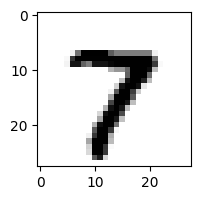

In [4]:
rand_data=x_train[np.random.randint(0,60001)]
plt.figure(figsize=(2,2))
plt.imshow(rand_data, cmap="binary") #imshow: It takes a NumPy array or an array-like object as input and renders it as a raster image

In [5]:
#Now Normalize pixel values of x_train, and x_test: 0-255 -> 0-1
x_train=x_train/255
x_test=x_test/255

## Defining the architecture of all models

**Model 1:** Has 2 hidden layers, each with 16 nodes, and uses the sigmoid function as activation.

In [6]:
model1=Sequential()
model1.add(Input(shape=(28, 28)))
model1.add(Flatten()) # i/p layer
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(10,activation="softmax")) #o/p layer


I0000 00:00:1771663168.517276      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


**Model 2:** Has 2 hidden layers, each with 16 nodes, and uses the ReLU function as activation.

In [7]:
model2=Sequential()
model2.add(Input(shape=(28, 28)))
model2.add(Flatten())
model2.add(Dense(16,activation="relu"))
model2.add(Dense(16,activation="relu"))
model2.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the sigmoid function as activation.

In [8]:
model3=Sequential()
model3.add(Input(shape=(28, 28)))
model3.add(Flatten())
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the ReLU function as activation.

In [9]:
model4=Sequential()
model4.add(Input(shape=(28, 28)))
model4.add(Flatten())
model4.add(Dense(64,activation="relu"))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(10,activation="softmax"))

## Compiling the models

In [10]:
model1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training and Validation

In [11]:
hist_model1=model1.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20


I0000 00:00:1771663171.210455      67 service.cc:152] XLA service 0x7bc658008540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771663171.210494      67 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771663171.432019      67 cuda_dnn.cc:529] Loaded cuDNN version 91002


  79/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1540 - loss: 2.2983

I0000 00:00:1771663172.170135      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5689 - loss: 1.6439 - val_accuracy: 0.8819 - val_loss: 0.5866
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8888 - loss: 0.5122 - val_accuracy: 0.9087 - val_loss: 0.3589
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9126 - loss: 0.3446 - val_accuracy: 0.9226 - val_loss: 0.2920
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9222 - loss: 0.2861 - val_accuracy: 0.9293 - val_loss: 0.2576
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9353 - loss: 0.2442 - val_accuracy: 0.9369 - val_loss: 0.2344
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9391 - loss: 0.2207 - val_accuracy: 0.9396 - val_loss: 0.2214
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9455 - loss: 0.1982 - val_accuracy: 0.9410 - val_loss: 0.2101
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9471 - loss: 0.1917 - val_accurac

In [12]:
hist_model2=model2.fit(x_train,y_train,batch_size=32, epochs=20, verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7342 - loss: 0.8681 - val_accuracy: 0.9153 - val_loss: 0.2833
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9221 - loss: 0.2742 - val_accuracy: 0.9319 - val_loss: 0.2329
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9330 - loss: 0.2305 - val_accuracy: 0.9398 - val_loss: 0.2087
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9401 - loss: 0.2069 - val_accuracy: 0.9388 - val_loss: 0.2100
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9454 - loss: 0.1831 - val_accuracy: 0.9444 - val_loss: 0.1892
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9493 - loss: 0.1714 - val_accuracy: 0.9478 - val_loss: 0.1857
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9528 - loss: 0.1617 - val_accuracy: 0.9493 - val_loss: 0.1772
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9551 - loss: 0.1500 - 

In [13]:
hist_model3=model3.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7262 - loss: 1.0858 - val_accuracy: 0.9237 - val_loss: 0.2657
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9307 - loss: 0.2471 - val_accuracy: 0.9471 - val_loss: 0.1902
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9481 - loss: 0.1784 - val_accuracy: 0.9541 - val_loss: 0.1579
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1369 - val_accuracy: 0.9602 - val_loss: 0.1346
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1112 - val_accuracy: 0.9625 - val_loss: 0.1283
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0911 - val_accuracy: 0.9653 - val_loss: 0.1168
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0785 - val_accuracy: 0.9653 - val_loss: 0.1133
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0678 - 

In [14]:
hist_model4=model4.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8449 - loss: 0.5287 - val_accuracy: 0.9513 - val_loss: 0.1685
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1430 - val_accuracy: 0.9591 - val_loss: 0.1378
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.0987 - val_accuracy: 0.9648 - val_loss: 0.1164
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0760 - val_accuracy: 0.9649 - val_loss: 0.1190
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9702 - val_loss: 0.1012
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9677 - val_loss: 0.1089
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0395 - val_accuracy: 0.9705 - val_loss: 0.1003
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0323 - 

In [15]:
print(f"val_accuracy\nmodel1: {hist_model1.history["val_accuracy"][-1]}\nmodel2: {hist_model2.history["val_accuracy"][-1]}\nmodel3: {hist_model3.history["val_accuracy"][-1]}\nmodel4: {hist_model4.history["val_accuracy"][-1]}")

val_accuracy
model1: 0.9466666579246521
model2: 0.9514166712760925
model3: 0.9679999947547913
model4: 0.971833348274231


## Testing

In [16]:
test_hist_model1=model1.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1949


In [17]:
test_hist_model2=model2.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1939


In [18]:
test_hist_model3=model3.evaluate(x_test,y_test, verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9658 - loss: 0.1178


In [19]:
test_hist_model4=model4.evaluate(x_test,y_test,verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.1469


## Calculating Generation Gap

In [20]:
models = {
    "model1": model1,
    "model2": model2,
    "model3": model3,
    "model4": model4
}

histories = {
    "model1": hist_model1,
    "model2": hist_model2,
    "model3": hist_model3,
    "model4": hist_model4
}
# gen_gap={i: histories[i].history["accuracy"][-1] - histories[i].history["val_accuracy"][-1] for i in histories}

# Epochs to Best Val Accuracy
epochs_to_best = {i: histories[i].history["val_accuracy"].index(max(histories[i].history["val_accuracy"])) + 1 
                  for i in histories}

# Generalization Gap (using the epoch with best val accuracy, more meaningful than final epoch)
gen_gap = {i: histories[i].history["accuracy"][epochs_to_best[i] - 1] - 
              histories[i].history["val_accuracy"][epochs_to_best[i] - 1] 
           for i in histories}

#calculating total parameters per model
total_params={i: models[i].count_params() for i in models}

## Accuracy and Generation gap comparison per model

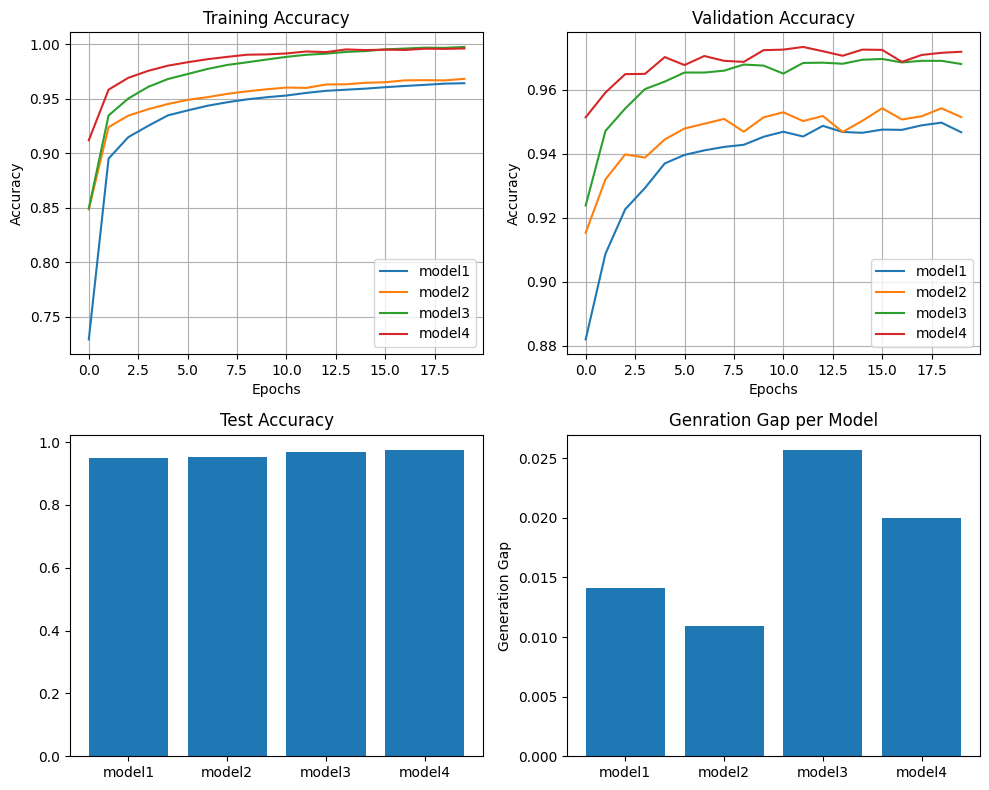

In [21]:
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axs[0,0].set_title("Training Accuracy")
axs[0,0].plot(hist_model1.history["accuracy"],label="model1")
axs[0,0].plot(hist_model2.history["accuracy"],label="model2")
axs[0,0].plot(hist_model3.history["accuracy"],label="model3")
axs[0,0].plot(hist_model4.history["accuracy"],label="model4")
axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Accuracy")
axs[0,0].grid(True)
axs[0,0].legend()

axs[0,1].plot(hist_model1.history["val_accuracy"],label="model1")
axs[0,1].plot(hist_model2.history["val_accuracy"],label="model2")
axs[0,1].plot(hist_model3.history["val_accuracy"],label="model3")
axs[0,1].plot(hist_model4.history["val_accuracy"],label="model4")
axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Accuracy")
axs[0,1].grid(True)
axs[0,1].legend()
axs[0,1].set_title("Validation Accuracy")

axs[1,0].set_title("Test Accuracy")
axs[1,0].bar(models.keys(),[test_hist_model1["accuracy"],test_hist_model2["accuracy"],test_hist_model3["accuracy"],test_hist_model4["accuracy"]])

axs[1,1].set_title("Genration Gap per Model")
axs[1,1].bar(gen_gap.keys(),gen_gap.values())
axs[1,1].set_ylabel("Generation Gap")

plt.tight_layout()
plt.show()


## Saving the best model based on Validation accuracy

In [22]:
best_mname=max(histories, key=lambda k: histories[k].history["val_accuracy"][-1])
best_model=models[best_mname]
print(f"Best model based on validation accuracy: {best_mname}")

best_model.save(f"{best_mname}.keras")
print(f"Best model {best_mname} is saved")


Best model based on validation accuracy: model4
Best model model4 is saved


## Confusion matrix of best model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


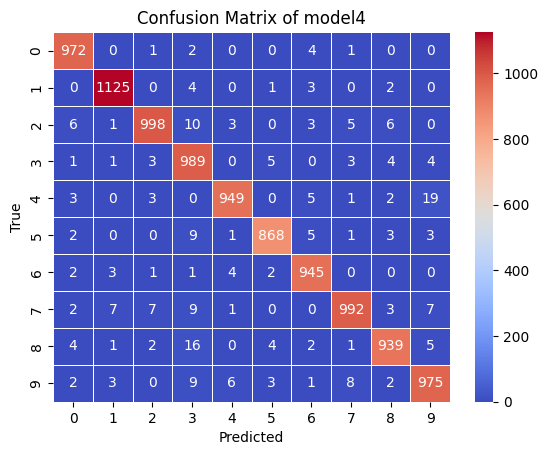

In [23]:
x_pred=best_model.predict(x_test)
x_pred_classes=np.argmax(x_pred,axis=1)
#confusion matrix
cm=tensorflow.math.confusion_matrix( labels=y_test, predictions=x_pred_classes, num_classes=10)
plt.title(f"Confusion Matrix of {best_mname}")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",linewidths=.5) 
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Some prediction of best model
> Format: True label/Predicted label

Format: True label/Predicted label


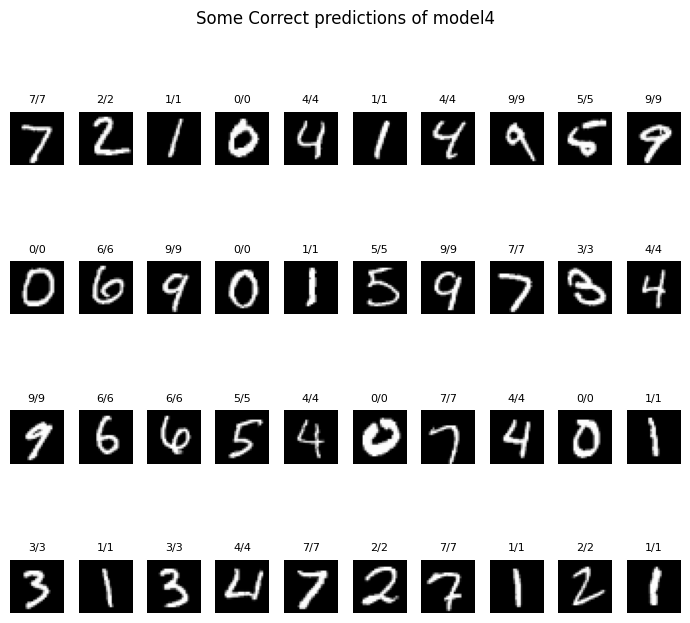

In [24]:
#some correct predictions of Model 4
print("Format: True label/Predicted label")
correct_indices = np.where(x_pred_classes == y_test)[0]
plt.figure(figsize=(7,7))
plt.suptitle(f"Some Correct predictions of {best_mname}")
for plot_index in range(40):
    plt.subplot(4,10, plot_index+1)
    plt.imshow(x_test[correct_indices[plot_index]],cmap="grey")
    plt.title(f"{y_test[correct_indices[plot_index]]}/{x_pred_classes[correct_indices[plot_index]]}",fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()